**Titanic Survival Predication Machine Learning Model**

Here we going to clean and analyse the data

In [3]:
#importing required libraries
import pandas as pd
import warnings 
warnings.filterwarnings("ignore")

In [4]:
#loading the data
df = pd.read_csv('Titanic-Dataset.csv')

In [5]:
#getting overview of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#displaying few data from the dataser
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
#chceking for any null value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#taking the required data columns for the model
x = df[['Pclass','Sex','Age']]
y = df.Survived

In [9]:
#chceking for any null value 
x.isnull().sum()

Pclass      0
Sex         0
Age       177
dtype: int64

In [10]:
#filling the empty columns
x.Age.fillna(x.Age.mean(),inplace=True)

In [11]:
#checking for any null value 
x.isnull().sum()

Pclass    0
Sex       0
Age       0
dtype: int64

In [12]:
x

,Pclass,Sex,Age
0,3,male,22.000000
1,1,female,38.000000
2,3,female,26.000000
3,1,female,35.000000
4,3,male,35.000000
...,...,...,...
886,2,male,27.000000
887,1,female,19.000000
888,3,female,29.699118
889,1,male,26.000000


In [13]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [14]:
#converting string value('Sex')  to numercial value (0,1)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
gen=le.fit_transform(x.Sex)

In [16]:
x["Gender"]=gen
x.drop("Sex",axis=1,inplace=True)

In [17]:
x

,Pclass,Age,Gender
0,3,22.000000,1
1,1,38.000000,0
2,3,26.000000,0
3,1,35.000000,0
4,3,35.000000,1
...,...,...,...
886,2,27.000000,1
887,1,19.000000,0
888,3,29.699118,0
889,1,26.000000,1


Here we going to visualize the data 

In [19]:
#importing the required libraries
import matplotlib.pyplot as plt
import seaborn as sns

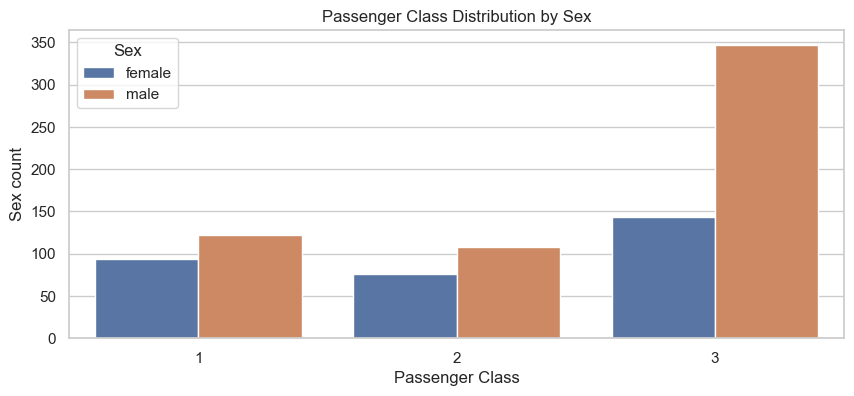

In [20]:
#Bar Plot showing the distribution of Passenger Class by Sex
sns.set(style="whitegrid")

plt.figure(figsize=(10,4))
sns.countplot(x='Pclass', hue ='Sex',data=df)
plt.xlabel('Passenger Class')
plt.ylabel('Sex count')
plt.title('Passenger Class Distribution by Sex')
plt.show()


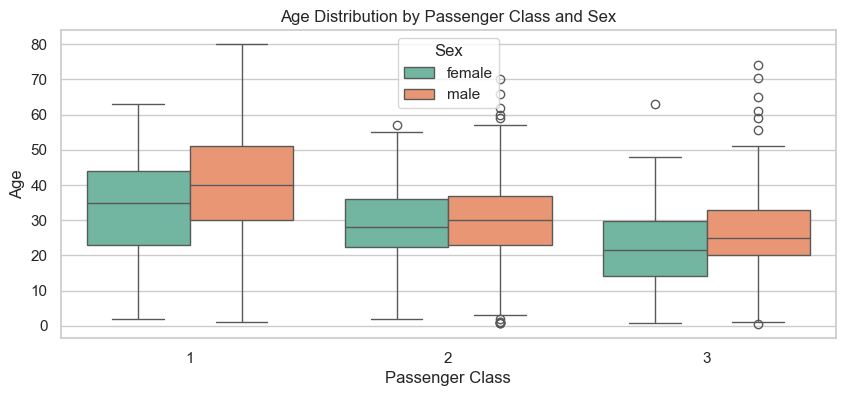

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=df, palette="Set2")
plt.title('Age Distribution by Passenger Class and Sex')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

Here we gong to build train model 

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
train_x, test_x,train_y,test_y = train_test_split(x,y,test_size = 0.2)

In [25]:
len(train_x)

712

In [26]:
len(test_x)

179

In [27]:
model = LogisticRegression()

In [28]:
model.fit(train_x,train_y)

LogisticRegression()

In [29]:
model.score(test_x,test_y)

0.770949720670391

In [30]:
x.head()

,Pclass,Age,Gender
0,3,22.0,1
1,1,38.0,0
2,3,26.0,0
3,1,35.0,0
4,3,35.0,1


In [31]:
model.predict([[1,34,0]])

array([1], dtype=int64)

In [32]:
if model.predict([[2,62,4]])[0]==1:
    print("Survived")
else:
    print("Not survived")

Not survived
